# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi.newsapi_client import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/brockfreeman/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()
api_key = os.getenv("NEWS_API")
type(api_key)

str

In [3]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
print(newsapi)

In [5]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    
)
# Print total articles
print(f"Total articles about Bitcoin: {btc_headlines['totalResults']}")

# Show sample article
btc_article = btc_headlines["articles"][0]
btc_article

Total articles about Bitcoin: 8243


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Elon Musk says Tesla will resume Bitcoin purchases when Bitcoin gets greener',
 'description': "It's all about clean energy, it seems.\xa0\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoins and that it will start accepting Bitcoin for purchases, an…",
 'url': 'https://mashable.com/article/tesla-bitcoin-purchases-green/',
 'urlToImage': 'https://mondrian.mashable.com/2021%252F06%252F14%252Fcc%252Faf6b974e89a64972a334f8675f5dc80a.36e5a.jpg%252F1200x630.jpg?signature=XiWTfhyod6_Xl2i4nyhER_1xCXQ=',
 'publishedAt': '2021-06-14T07:15:49Z',
 'content': "It's all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars]"}

In [6]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    
)
# Print total articles
print(f"Total articles about Ethereum: {eth_headlines['totalResults']}")

# Show sample article
eth_article =eth_headlines["articles"][0]
eth_article

Total articles about Ethereum: 2273


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Joseph Green',
 'title': 'This blockchain development course bundle is on sale for 97% off',
 'description': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\n\nIs everyone you know investing in cryptocurrency? The Cryptocurrency with Ethereum and Solidity Blockchain Dev…',
 'url': 'https://mashable.com/uk/shopping/june-17-cryptocurrency-ethereum-and-solidity-blockchain-developer-bundle/',
 'urlToImage': 'https://mondrian.mashable.com/2021%252F06%252F17%252Fa4%252Fd95c8d39ee014266beea8c6b9d053d19.1c765.jpg%252F1200x630.jpg?signature=13rMcdTv3FsupfDx5m8coAhsN-4=',
 'publishedAt': '2021-06-17T04:05:00Z',
 'content': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment_score = []

for x in btc_headlines["articles"]:
    try:
        text = x["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        
        bitcoin_sentiment_score.append({
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
        })
        
    except AttributeError:
        pass
        
btc_df = pd.DataFrame(bitcoin_sentiment_score)

btc_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.6908,0.169,0.000,0.831,"It's all about clean energy, it seems. \r\nElo..."
1,-0.5719,0.111,0.184,0.705,Filed under:\r\nThe supply chain attack has re...
2,-0.6124,0.000,0.143,0.857,image copyrightGetty Images\r\nThe gang behind...
3,0.1280,0.043,0.000,0.957,"SAN SALVADOR, June 16 (Reuters) - El Salvador ..."
4,0.2023,0.105,0.057,0.838,"LONDON, June 23 (Reuters) - El Salvador is det..."


In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment_score = []

for x in eth_headlines["articles"]:
    try:
        text = x["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        
        eth_sentiment_score.append({
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
        })
        
    except AttributeError:
        pass
        
eth_df = pd.DataFrame(eth_sentiment_score)

eth_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.0000,0.000,0.000,1.000,TL;DR: The Cryptocurrency with Ethereum and So...
1,-0.2960,0.000,0.061,0.939,It wasn't long ago that your average person ha...
2,0.3612,0.110,0.041,0.849,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...
3,0.7717,0.194,0.000,0.806,"Ether holders have ""staked"" more than $13 bill..."
4,0.6249,0.150,0.000,0.850,Ether is the cryptocurrency of the ethereum ne...


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.033525,0.044050,0.043450,0.912450
std,0.338398,0.056322,0.053315,0.078077
min,-0.612400,0.000000,0.000000,0.705000
25%,-0.300350,0.000000,0.000000,0.853000
50%,0.000000,0.000000,0.028500,0.923000
75%,0.146575,0.089250,0.075500,0.967750
max,0.690800,0.169000,0.184000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.055955,0.040500,0.026800,0.932700
std,0.364838,0.058708,0.034713,0.053304
min,-0.381800,0.000000,0.000000,0.806000
25%,-0.278900,0.000000,0.000000,0.920000
50%,0.000000,0.000000,0.000000,0.931000
75%,0.361200,0.074750,0.060250,0.961000
max,0.771700,0.194000,0.080000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the higher mean positive score (0.049) compared to Ethereum (0.040).

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score at 0.77 compared to the compound score of 0.69 from Bitcoin.

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score at 0.19 compared to the 0.16 maximum received by Bitcoin.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brockfreeman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words("English"))

# Expand the default stopwords list if neccesary 
sw_addon = {"pca","ec"}

In [32]:
# Complete the tokenizer function
def tokenizer(text):
    sw= set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens

In [33]:
# Create a new tokens column for bitcoin
btc_df["tokens"] = btc_df.Text.apply(tokenizer)
btc_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.6908,0.169,0.000,0.831,"It's all about clean energy, it seems. \r\nElo...","[clean, energy, seemselon, musk, tesla, caused..."
1,-0.5719,0.111,0.184,0.705,Filed under:\r\nThe supply chain attack has re...,"[filed, underthe, supply, chain, attack, ha, r..."
2,-0.6124,0.000,0.143,0.857,image copyrightGetty Images\r\nThe gang behind...,"[image, copyrightgetty, imagesthe, gang, behin..."
3,0.1280,0.043,0.000,0.957,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...","[san, salvador, june, reuters, el, salvador, r..."
4,0.2023,0.105,0.057,0.838,"LONDON, June 23 (Reuters) - El Salvador is det...","[london, june, reuters, el, salvador, determin..."


In [34]:
# Create a new tokens column for bitcoin
eth_df["tokens"] = eth_df.Text.apply(tokenizer)
eth_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.0000,0.000,0.000,1.000,TL;DR: The Cryptocurrency with Ethereum and So...,"[tldr, cryptocurrency, ethereum, solidity, blo..."
1,-0.2960,0.000,0.061,0.939,It wasn't long ago that your average person ha...,"[wasnt, long, ago, average, person, clue, nft,..."
2,0.3612,0.110,0.041,0.849,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
3,0.7717,0.194,0.000,0.806,"Ether holders have ""staked"" more than $13 bill...","[ether, holder, staked, billion, worth, crypto..."
4,0.6249,0.150,0.000,0.850,Ether is the cryptocurrency of the ethereum ne...,"[ether, cryptocurrency, ethereum, networkphoto..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [35]:
from collections import Counter
from nltk import ngrams

In [41]:
# Tokenize BTC article
btc_tokenized = tokenizer(btc_df.Text.str.cat())
btc_tokenized

['clean',
 'energy',
 'seemselon',
 'musk',
 'tesla',
 'caused',
 'ripple',
 'cryptocurrency',
 'market',
 'past',
 'month',
 'first',
 'announcing',
 'tesla',
 'bought',
 'billion',
 'worth',
 'bitcoi',
 'charsfiled',
 'underthe',
 'supply',
 'chain',
 'attack',
 'ha',
 'reached',
 'thousand',
 'organizationsillustration',
 'alex',
 'castro',
 'vergethree',
 'day',
 'ransomware',
 'attacker',
 'started',
 'holiday',
 'weekend',
 'comprom',
 'charsimage',
 'copyrightgetty',
 'imagesthe',
 'gang',
 'behind',
 'colossal',
 'ransomware',
 'attack',
 'ha',
 'demanded',
 'paid',
 'bitcoin',
 'return',
 'universal',
 'decryptor',
 'say',
 'unlock',
 'file',
 'charssan',
 'salvador',
 'june',
 'reuters',
 'el',
 'salvador',
 'replace',
 'us',
 'dollar',
 'bitcoin',
 'legal',
 'tender',
 'finance',
 'minister',
 'alejandro',
 'zelaya',
 'said',
 'wednesday',
 'central',
 'american',
 'nation',
 'charslondon',
 'june',
 'reuters',
 'el',
 'salvador',
 'determined',
 'push',
 'ahead',
 'making',

In [42]:
# Tokenize ETH article
eth_tokenized = tokenizer(eth_df.Text.str.cat())
eth_tokenized

['tldr',
 'cryptocurrency',
 'ethereum',
 'solidity',
 'blockchain',
 'developer',
 'bundle',
 'sale',
 'june',
 'saving',
 'list',
 'priceis',
 'everyone',
 'know',
 'investing',
 'cryptocurrency',
 'charsit',
 'wasnt',
 'long',
 'ago',
 'average',
 'person',
 'clue',
 'nft',
 'wa',
 'nowadays',
 'theyre',
 'making',
 'headline',
 'selling',
 'hundred',
 'thousand',
 'buck',
 'predictably',
 'folk',
 'learning',
 'nfts',
 'charsbitcoin',
 'ethereumyuriko',
 'nakaoether',
 'overtook',
 'bitcoin',
 'number',
 'active',
 'address',
 'network',
 'friday',
 'sign',
 'demand',
 'faltering',
 'world',
 'biggest',
 'cryptocurrency',
 'co',
 'charsether',
 'holder',
 'staked',
 'billion',
 'worth',
 'cryptocurrency',
 'ethereum',
 'network',
 'excitement',
 'build',
 'around',
 'overhaul',
 'system',
 'potential',
 'growth',
 'staki',
 'charsether',
 'cryptocurrency',
 'ethereum',
 'networkphotothekgetty',
 'imagesether',
 'holder',
 'staked',
 'billion',
 'worth',
 'cryptocurrency',
 'ethereu

In [45]:
# Generate the Bitcoin N-grams where N=2
btc_ngrams = Counter(ngrams(btc_tokenized, n=2))
print(dict(btc_ngrams))

{('clean', 'energy'): 1, ('energy', 'seemselon'): 1, ('seemselon', 'musk'): 1, ('musk', 'tesla'): 1, ('tesla', 'caused'): 1, ('caused', 'ripple'): 1, ('ripple', 'cryptocurrency'): 1, ('cryptocurrency', 'market'): 1, ('market', 'past'): 1, ('past', 'month'): 1, ('month', 'first'): 1, ('first', 'announcing'): 1, ('announcing', 'tesla'): 1, ('tesla', 'bought'): 1, ('bought', 'billion'): 1, ('billion', 'worth'): 1, ('worth', 'bitcoi'): 1, ('bitcoi', 'charsfiled'): 1, ('charsfiled', 'underthe'): 1, ('underthe', 'supply'): 1, ('supply', 'chain'): 1, ('chain', 'attack'): 1, ('attack', 'ha'): 2, ('ha', 'reached'): 1, ('reached', 'thousand'): 1, ('thousand', 'organizationsillustration'): 1, ('organizationsillustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'vergethree'): 1, ('vergethree', 'day'): 1, ('day', 'ransomware'): 1, ('ransomware', 'attacker'): 1, ('attacker', 'started'): 1, ('started', 'holiday'): 1, ('holiday', 'weekend'): 1, ('weekend', 'comprom'): 1, ('comprom', 'charsimage

In [46]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = Counter(ngrams(eth_tokenized, n=2))
print(dict(eth_ngrams))

{('tldr', 'cryptocurrency'): 1, ('cryptocurrency', 'ethereum'): 5, ('ethereum', 'solidity'): 2, ('solidity', 'blockchain'): 2, ('blockchain', 'developer'): 2, ('developer', 'bundle'): 2, ('bundle', 'sale'): 1, ('sale', 'june'): 1, ('june', 'saving'): 1, ('saving', 'list'): 1, ('list', 'priceis'): 1, ('priceis', 'everyone'): 1, ('everyone', 'know'): 1, ('know', 'investing'): 1, ('investing', 'cryptocurrency'): 1, ('cryptocurrency', 'charsit'): 1, ('charsit', 'wasnt'): 1, ('wasnt', 'long'): 1, ('long', 'ago'): 1, ('ago', 'average'): 1, ('average', 'person'): 1, ('person', 'clue'): 1, ('clue', 'nft'): 1, ('nft', 'wa'): 1, ('wa', 'nowadays'): 1, ('nowadays', 'theyre'): 1, ('theyre', 'making'): 1, ('making', 'headline'): 1, ('headline', 'selling'): 1, ('selling', 'hundred'): 1, ('hundred', 'thousand'): 1, ('thousand', 'buck'): 1, ('buck', 'predictably'): 1, ('predictably', 'folk'): 1, ('folk', 'learning'): 1, ('learning', 'nfts'): 1, ('nfts', 'charsbitcoin'): 1, ('charsbitcoin', 'ethereumyu

In [47]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [48]:
# Use token_count to get the top 10 words for Bitcoin
btc_common= token_count(btc_tokenized, 10)
btc_common

[('bitcoin', 19),
 ('reuters', 17),
 ('cryptocurrency', 7),
 ('june', 7),
 ('salvador', 6),
 ('monday', 5),
 ('previous', 5),
 ('closebitcoin', 5),
 ('world', 5),
 ('biggest', 5)]

In [49]:
# Use token_count to get the top 10 words for Ethereum
eth_common= token_count(eth_tokenized, 10)
eth_common

[('cryptocurrency', 16),
 ('world', 11),
 ('reuters', 11),
 ('biggest', 9),
 ('previous', 8),
 ('closebitcoin', 8),
 ('bestknown', 8),
 ('bitcoin', 7),
 ('gmt', 7),
 ('ethereum', 6)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

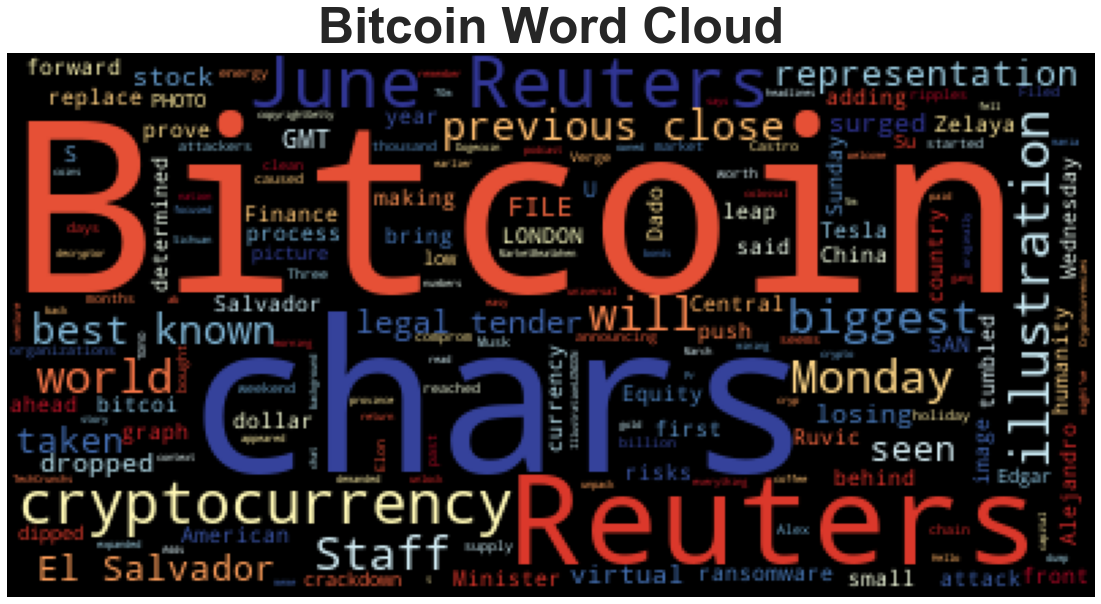

In [51]:
# Generate the Bitcoin word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(btc_df.Text.str.cat())
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

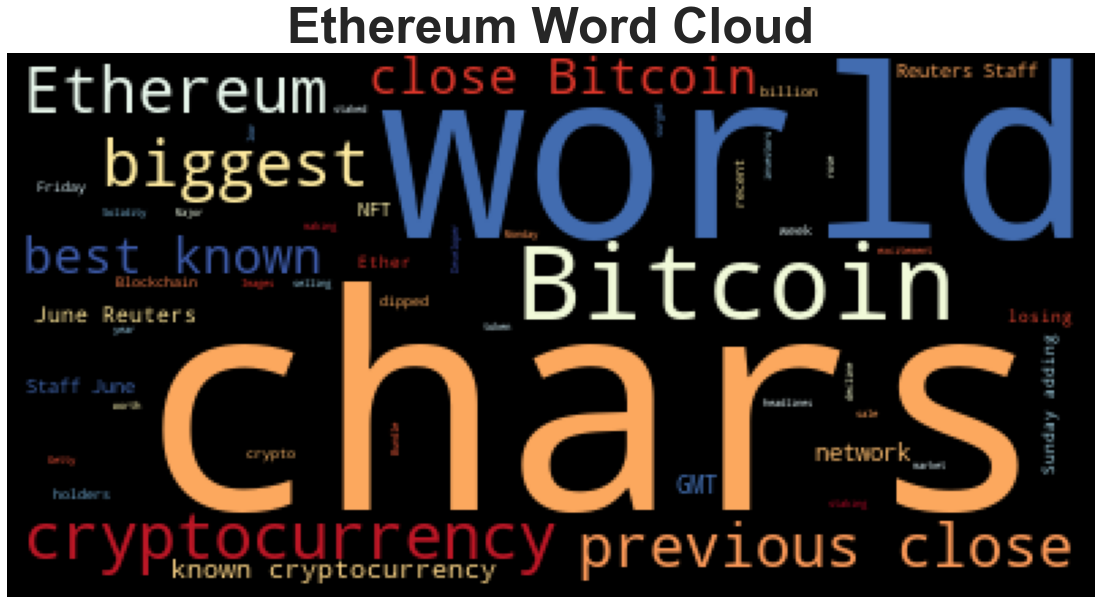

In [52]:
# Generate the Ethereum word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(eth_df.Text.str.cat())
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [53]:
import spacy
from spacy import displacy

In [55]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [56]:
# Concatenate all of the Bitcoin text together
btc_text_combined = btc_df.Text.str.cat()
btc_text_combined

'It\'s all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars]Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars]image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars]SAN SALVADOR, June 16 (Reuters) - El Salvador will not replace the U.S. dollar with bitcoin as the legal tender, Finance Minister Alejandro Zelaya said on Wednesday, as the Central American nation so… [+1266 chars]LONDON, June 23 (Reuters) - El Salvador is determined to push ahead with making bitcoin legal tender, a process that will bring o

In [57]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text_combined)
btc_ner
# Add a title to the document
btc_ner.user_data["title"] = "Bitcoin NER"

In [58]:
# Render the visualization
displacy.render(btc_ner, style="ent")

In [59]:
# List all Entities
for ent in btc_ner.ents:
    print(ent.text, ent.label_)

the past few months DATE
first ORDINAL
Tesla ORDINAL
$1.5 billion MONEY
thousand CARDINAL
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
$70m MONEY
£50.5m MONEY
Bitcoin GPE
June 16 DATE
Reuters ORG
El Salvador GPE
U.S. GPE
Alejandro Zelaya PERSON
Wednesday DATE
Central American NORP
June 23 DATE
Reuters ORG
El Salvador GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Reuters ORG
Reuters ORG
El Salvador GPE
U.S. GPE
Alejandro Zelaya PERSON
Wednesday DATE
the Central American NORP
MarketBeatWhen GPE
earlier this year DATE
Dogecoin PERSON
Reuters ORG
June 13 DATE
Reuters ORG
Bitcoin GPE
9.8% PERCENT
39,035.47 MONEY
Sunday DATE
3,492.71 MONEY
Bitcoin GPE
Bitcoin GPE
March 15, 2021 DATE
REUTERS/ ORG
Dado Ruvic PERSON
June 30 DATE
Reuters ORG
chars]TOKYO DATE
June 21 DATE
Reuters ORG
Monday DATE
China GPE
bitcoin GPE
Sichuan GPE
Bitcoin GPE
as low as $32,288 MONEY
first ORDINAL
21 CARDINAL
Reuters ORG
8.57% PERCENT
32,540.35 MONEY
2011 DATE
Monday DATE
3,049.42 MONEY
B

---

### Ethereum NER

In [60]:
# Concatenate all of the Ethereum text together
eth_text_combined = eth_df.Text.str.cat()
eth_text_combined

'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars]It wasn\'t long ago that your average person had no clue what an NFT was. Nowadays, they\'re making headlines for selling for hundreds of thousands of bucks. Predictably, folks are learning about NFTs … [+3056 chars]Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world\'s biggest cryptocurrency as its co… [+2727 chars]Ether holders have "staked" more than $13 billion worth of the cryptocurrency on the ethereum 2.0 network, as excitement builds around the overhaul of the system and the potential growth of the staki… [+1851 chars]Ether is the cryptocurrency of the ethereum network.\r\nPhotothek/Getty Images\r\nEther holders have "staked" more than $13 billion wor

In [61]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_text_combined)

# Add a title to the document
eth_ner.user_data["title"] = "Ethereum NER"

In [62]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [63]:
# List all Entities
for ent in eth_ner.ents:
    print(ent.text, ent.label_)

21.25 MONEY
June 17 DATE
97% PERCENT
NFT ORG
hundreds of thousands CARDINAL
Yuriko Nakao PERSON
Friday DATE
more than $13 billion MONEY
Photothek PERSON
more than $13 billion MONEY
$40 billion MONEY
2025 DATE
JPMorgan ORG
Tim Berners-Lee PERSON
the World Wide Web ORG
NFT ORG
Sotheby's ORG
NFT ORG
Last week DATE
token ORG
NFT ORG
90 percent PERCENT
recent weeks DATE
recent months DATE
the third week DATE
February 2018 DATE
CoinSh CARDINAL
Reuters ORG
June 13 DATE
Reuters ORG
9.83 % PERCENT
39,035.47 MONEY
22:05 GMT TIME
Sunday DATE
3,492.71 MONEY
Bitcoin GPE
5.11 % PERCENT
37,360.63 MONEY
18:10 GMT TIME
Sunday DATE
1,817.87 MONEY
Bitcoin GPE
34.7% PERCENT
year DATE
Reuters ORG
June 13 DATE
Reuters ORG
5.11 % PERCENT
37,360.63 MONEY
18:10 GMT TIME
Sunday DATE
1,817.87 MONEY
Bitcoin GPE
Reuters ORG
June 25 DATE
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Friday DATE
2,554.88 MONEY
Bitcoin GPE
50.5 CARDINAL
chars]Bitcoin DATE
9.83 % PERCENT
39,035.47 MONEY
22:05 GMT TIME
Sunday DATE
3,492.71

---